Import Common Packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

%matplotlib inline

In [287]:
# Read Data

df=pd.read_csv('InsuranceClean.csv')
df1=df.copy()

In [288]:
pd.options.display.max_columns = 99

In [289]:
df.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance,CallTime,balanse
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,Not contacted,825,826,0,1,up to 1500$
1,2,32,blue-collar,married,primary,0,1156,1,0,cellular,26,may,5,-1,0,Not contacted,889,892,0,3,up to 1500$
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,990,996,1,6,up to 1000$
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,Not contacted,726,740,1,14,up to 500$
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,Not contacted,875,878,0,3,above 2000$


## DATA PREPARATION

### Feature Selection

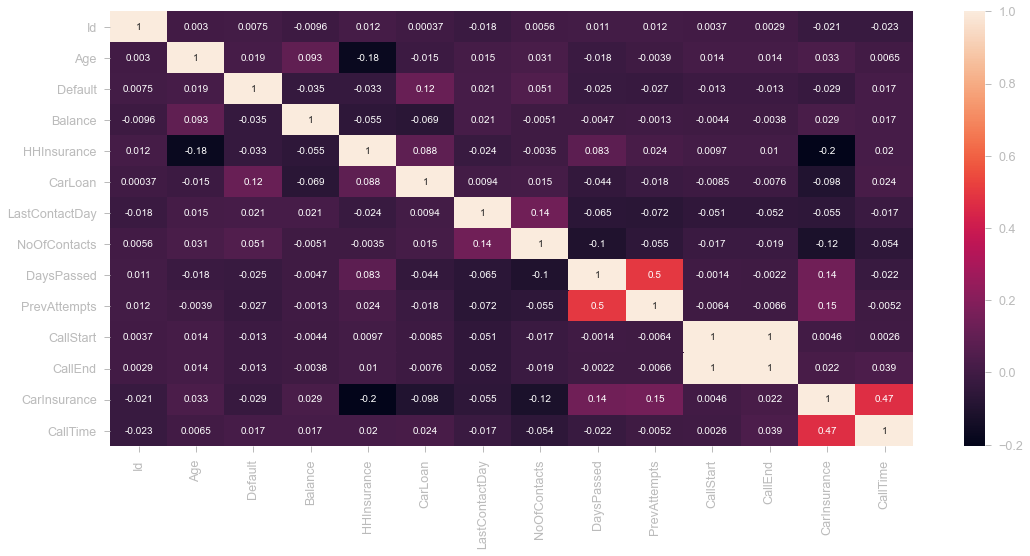

In [290]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(), annot=True)

- Checking Correlation between target feature with other numerical features.
### Initial Hypothesis
- HHInsurance, No of Contacts, Days passed, PrevAttempts and Call Time have a good correlation with target feature
- We cannot determined the feature selection only based on df.corr(). So I will get the feature based on the EDA.
- in Object types of feature I will use Job, Marital, Education and outcome based on the EDA section

### FEATURE ENGINEERING

In [291]:
# Convert last contact month to numerical
df.loc[df['LastContactMonth']=='jan','LastContactMonth'] = 1
df.loc[df['LastContactMonth']=='feb','LastContactMonth'] = 2
df.loc[df['LastContactMonth']=='mar','LastContactMonth'] = 3
df.loc[df['LastContactMonth']=='apr','LastContactMonth'] = 4
df.loc[df['LastContactMonth']=='may','LastContactMonth'] = 5
df.loc[df['LastContactMonth']=='jun','LastContactMonth'] = 6
df.loc[df['LastContactMonth']=='jul','LastContactMonth'] = 7
df.loc[df['LastContactMonth']=='aug','LastContactMonth'] = 8
df.loc[df['LastContactMonth']=='sep','LastContactMonth'] = 9
df.loc[df['LastContactMonth']=='oct','LastContactMonth'] = 10
df.loc[df['LastContactMonth']=='nov','LastContactMonth'] = 11
df.loc[df['LastContactMonth']=='dec','LastContactMonth'] = 12

In [292]:
df['LastContactMonth'] = df['LastContactMonth'].astype('int64')
# Convert into int64 types

In [293]:
# Binning
bin_month = [0,3,6,9,12]
label_month = ['q1','q2','q3', 'q4']
df['bin_month'] = pd.cut(df['LastContactMonth'], bins = bin_month, labels = label_month)

In [294]:
df.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance,CallTime,balanse,bin_month
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,1,2,-1,0,Not contacted,825,826,0,1,up to 1500$,q1
1,2,32,blue-collar,married,primary,0,1156,1,0,cellular,26,5,5,-1,0,Not contacted,889,892,0,3,up to 1500$,q2
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,6,1,119,1,failure,990,996,1,6,up to 1000$,q2
3,4,25,student,single,primary,0,373,1,0,cellular,11,5,2,-1,0,Not contacted,726,740,1,14,up to 500$,q2
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,6,1,-1,0,Not contacted,875,878,0,3,above 2000$,q2


### Recategorized

In [295]:
df['job'] = df.loc[(df['Job']=='student') & (df['Job']=='retired') & (df['Job']=='unemployed'), 'Job'] = 'Not working'
df['job'] = df.loc[(df['Job']=='self-employed') & (df['Job']=='entrepreneur') & (df['Job']=='housemaid') & (df['Job']=='blue-collar'), 'Job'] = 'Other Job'
df['job'] = df.loc[(df['Job']=='management') & (df['Job']=='admin.') & (df['Job']=='technician') & (df['Job']=='services'), 'Job'] = 'Formal Job'

In [296]:
df.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance,CallTime,balanse,bin_month,job
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,1,2,-1,0,Not contacted,825,826,0,1,up to 1500$,q1,Formal Job
1,2,32,blue-collar,married,primary,0,1156,1,0,cellular,26,5,5,-1,0,Not contacted,889,892,0,3,up to 1500$,q2,Formal Job
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,6,1,119,1,failure,990,996,1,6,up to 1000$,q2,Formal Job
3,4,25,student,single,primary,0,373,1,0,cellular,11,5,2,-1,0,Not contacted,726,740,1,14,up to 500$,q2,Formal Job
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,6,1,-1,0,Not contacted,875,878,0,3,above 2000$,q2,Formal Job


#### LABEL ENCODING

In [297]:
from sklearn.preprocessing import LabelEncoder

In [298]:
df['Communication_encode'] = LabelEncoder().fit_transform(df['Communication'])

In [299]:
df['balanse'].unique()

array(['up to 1500$', 'up to 1000$', 'up to 500$', 'above 2000$',
       'up to 2000$'], dtype=object)

In [300]:
df['balanse_encode'] = df['balanse'].map({'up to 500$': 0, 'up to 1000$': 1, 'up to 1500$': 2, 'up to 2000$':3, 'above 2000$':4})

#### ONE HOT ENCODING

In [301]:
df = pd.get_dummies(df, columns=['job', 'bin_month','Marital','Education','Outcome'])

In [302]:
df.shape

(3735, 26)

In [303]:
df.head()

,Id,Age,Job,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance,CallTime,balanse,bin_month,Communication_encode,balanse_encode,Marital_married,Marital_single,Education_secondary,Education_tertiary
0,1,32,management,0,1218,1,0,telephone,28,1,2,-1,0,Not contacted,825,826,0,1,up to 1500$,q1,1,2,0,1,0,1
1,2,32,blue-collar,0,1156,1,0,cellular,26,5,5,-1,0,Not contacted,889,892,0,3,up to 1500$,q2,0,2,1,0,0,0
2,3,29,management,0,637,1,0,cellular,3,6,1,119,1,failure,990,996,1,6,up to 1000$,q2,0,1,0,1,0,1
3,4,25,student,0,373,1,0,cellular,11,5,2,-1,0,Not contacted,726,740,1,14,up to 500$,q2,0,0,0,1,0,0
4,5,30,management,0,2694,0,0,cellular,3,6,1,-1,0,Not contacted,875,878,0,3,above 2000$,q2,0,4,1,0,0,1


#### TRAIN TEST SPLIT

In [231]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [404]:
X = df.drop(columns=['Id','Communication','LastContactDay','CallStart','CallEnd','CarInsurance','balanse','Balance','Job','LastContactMonth'])
y = df['CarInsurance']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.85, stratify=y, random_state=666)

# Memisah data untuk train sebanyak 85% dan test 15% dan stratify agar data yang diambil dari carInsurance 0 dan 1 sama banyak persentasenya.

In [405]:
print(X_train.shape)
print(X_test.shape)

# cek jumlah data train dan test

(3174, 12)
(561, 12)


In [406]:
X_train.head()

,Age,HHInsurance,NoOfContacts,DaysPassed,PrevAttempts,CallTime,Communication_encode,balanse_encode,Marital_married,Marital_single,Education_secondary,Education_tertiary
498,72,0,5,184,3,19,0,4,1,0,1,0
1251,26,0,2,-1,0,3,0,0,0,1,0,1
3337,28,0,41,-1,0,0,0,1,0,1,1,0
103,52,0,1,-1,0,5,0,0,1,0,0,1
2308,25,0,1,-1,0,5,0,0,0,1,1,0


## Machine Learning Modelling

- The Model will focus on recall 1, to reduce the error of machine predicted not interested but actual interested.

#### Logistic Regression

In [407]:
from sklearn.linear_model import LogisticRegression

In [408]:
modelLR = LogisticRegression()

In [409]:
modelLR.fit(X_train, y_train)
y_predLR = modelLR.predict(X_test)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [410]:
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, accuracy_score

In [411]:
print(classification_report(y_test, y_predLR))

# The Recall 1 score is 71% with the accuracy score of 81%
# Since the Goals is to reduce the error of machine predicting not interested but actual interested so I will try to increase the recall%

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       329
           1       0.77      0.68      0.72       232

    accuracy                           0.78       561
   macro avg       0.78      0.77      0.77       561
weighted avg       0.78      0.78      0.78       561



In [412]:
# accuracy_score(y_test, y_predLR)

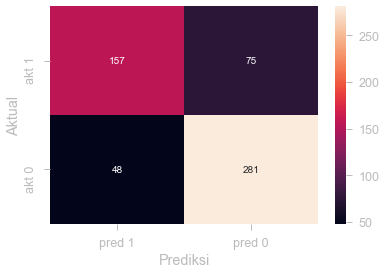

In [413]:
cm_LR = confusion_matrix(y_test, y_predLR, labels=[1,0])
df_LR = pd.DataFrame(data=cm_LR, index=['akt 1', 'akt 0'], columns=['pred 1', 'pred 0'])
sns.heatmap(df_LR, annot=True, fmt='d');
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.show()

# data 561 jumlah test data, Jumlah FN 75 dan FP 48, yang artinya machine menebak tidak tertarik tetapi aktual tertarik sejumlah 75 data

In [414]:
# df1.head()

In [415]:
# df1 = pd.get_dummies(df1, columns=['Job', 'bin_month','Marital','Education','Outcome'])

In [416]:
# X = df1.drop(columns=['Id','Communication','LastContactDay','CallStart','CallEnd','CarInsurance','balanse','Balance'])
# y = df1['CarInsurance']

# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.85, stratify=y, random_state=666)

#### Random Forest

In [417]:
from sklearn.ensemble import RandomForestClassifier

In [418]:
%%time
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

Wall time: 319 ms


RandomForestClassifier()

In [419]:
%%time
y_base_RF = model_rf.predict(X_test)
y_base_train = model_rf.predict(X_train)

Wall time: 84 ms


In [420]:
cm_base_rf = confusion_matrix(y_test, y_base_RF, labels=[1,0])
df_base_rf = pd.DataFrame(data=cm_base_rf, index=['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])
print(classification_report(y_test, y_base_RF));

# Dengan menggunakan model Random Forest Recall score naik dibanding dengan logistic regression
# tingkat akurasi juga naik dibanding Logistic Regression

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       329
           1       0.76      0.73      0.75       232

    accuracy                           0.80       561
   macro avg       0.79      0.79      0.79       561
weighted avg       0.79      0.80      0.79       561



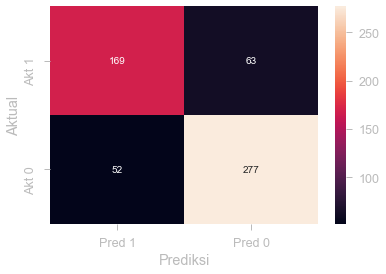

In [421]:
sns.heatmap(df_base_rf, annot=True,fmt='d');
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.show()

# dari 561 jumlah data machine menebak client tidak tertarik padahal aktualnya tertarik sebanyak 42 kali
# dan menebak client tertarik aktualnya tidak tertarik sebanyak 63 kali

#### XGB

In [422]:
import xgboost as xgb
from xgboost import XGBClassifier

In [423]:
%%time
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
y_base_XGB = model_xgb.predict(X_test)
y_xgb_train = model_xgb.predict(X_train)

Wall time: 138 ms


In [424]:
cm_base_xgb = confusion_matrix(y_test, y_base_XGB, labels=[1,0])
df_base_xgb = pd.DataFrame(data=cm_base_xgb, index=['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])
print(classification_report(y_test, y_base_XGB));

# Menggunakan Model XGB juga terlihat recall score lebih baik dibanding Logistic Regression dan kurang sedikit dibanding RF
# Begitu pula dengan accuracy scorenya

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       329
           1       0.75      0.73      0.74       232

    accuracy                           0.79       561
   macro avg       0.78      0.78      0.78       561
weighted avg       0.79      0.79      0.79       561



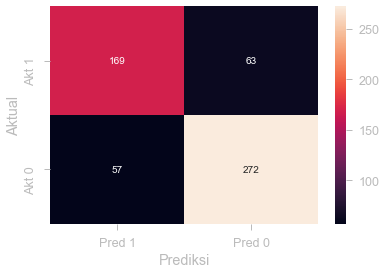

In [425]:
sns.heatmap(df_base_xgb, annot=True,fmt='d');
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.show()

# dari 561 jumlah data machine menebak client tidak tertarik padahal aktualnya tertarik sebanyak 45 kali
# dan menebak client tertarik aktualnya tidak tertarik sebanyak 63 kali

## HYPER PARAMETER TUNING

In [426]:
#### Logistic Regression HPT

In [427]:
LR = LogisticRegression()

In [487]:
param_LR = {'penalty':['l1', 'l2', 'elasticnet', 'none'],
            'max_iter': [100,200,1000],
            'C': [1],
            'tol': [0.0001,0.0005]
           }

In [488]:
Tune_LR = GridSearchCV(LR, param_grid=param_LR, cv= 5, n_jobs= -1, verbose= 1, scoring='recall')
Tune_LR.fit(X_train, y_train) 

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.9s finished
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1], 'max_iter': [100, 200, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'tol': [0.0001, 0.0005]},
             scoring='recall', verbose=1)

In [489]:
Tune_LR.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l2', 'tol': 0.0001}

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       329
           1       0.77      0.68      0.72       232

    accuracy                           0.78       561
   macro avg       0.78      0.77      0.77       561
weighted avg       0.78      0.78      0.78       561



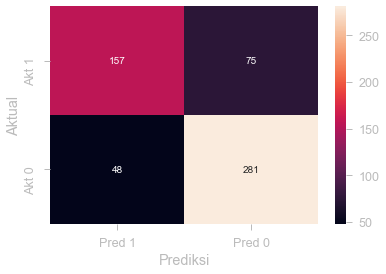

In [490]:
model_Tune_LR = Tune_LR.best_estimator_
y_tune_lr = model_Tune_LR.predict(X_test)
cm_tune_lr = confusion_matrix(y_test, y_tune_lr, labels=[1,0])
df_tune_lr = pd.DataFrame(data=cm_tune_lr, index=['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])
print(classification_report(y_test, y_tune_lr));
sns.heatmap(df_tune_lr, annot=True,fmt='d');
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.show()

# Setelah dituning terlihat dari confusion matrix bahwa fn sedikit berkurang hanya 1 poin.

#### Random Forest HPT

In [436]:
RF_tuned = RandomForestClassifier()
param_RF = {'n_estimators': [100,2000,5000],
            'max_depth': [None,5,7,8],
            'min_samples_split': [2,10,20],
            'max_features': ['auto',5],
           }

In [437]:
model_RF = RandomizedSearchCV(RF_tuned, param_distributions=param_RF, cv= 5, n_jobs= -1, verbose= 1, scoring='recall')
model_RF.fit(X_train, y_train) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 7, 8],
                                        'max_features': ['auto', 5],
                                        'min_samples_split': [2, 10, 20],
                                        'n_estimators': [100, 2000, 5000]},
                   scoring='recall', verbose=1)

In [438]:
model_RF.best_params_

{'n_estimators': 2000,
 'min_samples_split': 20,
 'max_features': 5,
 'max_depth': None}

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       329
           1       0.80      0.75      0.77       232

    accuracy                           0.82       561
   macro avg       0.81      0.81      0.81       561
weighted avg       0.82      0.82      0.82       561



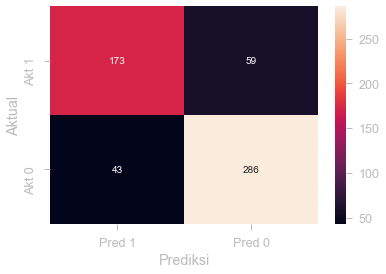

In [439]:
model_tuned_RF = model_RF.best_estimator_
y_tune_rf = model_tuned_RF.predict(X_test)
cm_tune_rf = confusion_matrix(y_test, y_tune_rf, labels=[1,0])
df_tune_rf = pd.DataFrame(data=cm_tune_rf, index=['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])
print(classification_report(y_test, y_tune_rf));
sns.heatmap(df_tune_rf, annot=True,fmt='d');
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.show()

In [440]:
y_tune_rf_train = model_tuned_RF.predict(X_train)
print(accuracy_score(y_train, y_tune_rf_train))
print(accuracy_score(y_test, y_tune_rf))

0.8651543793320731
0.8181818181818182


### XGB HPT

In [492]:
XGB_Tuned = XGBClassifier()
param_xgb = {'max_depth': [6,1],
             'learning_rate': [0.300000012,0.600000012] , 
             'n_estimators': [1000], 
             'gamma': [0,.5], 
             'colsample_bytree': [1,0.5],
             'subsample': [1], 
             'reg_alpha':[0,0.5] ,
             'reg_lambda': [1,0.8]}

In [493]:
model_XGB = RandomizedSearchCV(XGB_Tuned, param_distributions=param_xgb, cv= 5, n_jobs= -1, verbose= 1, scoring='recall')
model_XGB.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   15.2s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No

In [494]:
model_XGB.best_params_

{'subsample': 1,
 'reg_lambda': 1,
 'reg_alpha': 0.5,
 'n_estimators': 1000,
 'max_depth': 6,
 'learning_rate': 0.300000012,
 'gamma': 0,
 'colsample_bytree': 1}

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       329
           1       0.76      0.74      0.75       232

    accuracy                           0.80       561
   macro avg       0.79      0.79      0.79       561
weighted avg       0.79      0.80      0.79       561



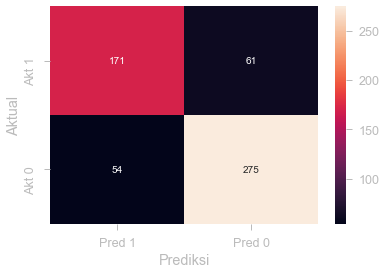

In [495]:
model_tuned_XGB = model_XGB.best_estimator_
y_tune_xgb = model_tuned_XGB.predict(X_test)
cm_tune_xgb = confusion_matrix(y_test, y_tune_xgb, labels=[1,0])
df_tune_xgb = pd.DataFrame(data=cm_tune_xgb, index=['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])
print(classification_report(y_test, y_tune_xgb));
sns.heatmap(df_tune_xgb, annot=True,fmt='d');
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.show()

In [496]:
y_tune_xgb_train = model_tuned_XGB.predict(X_train)
print(accuracy_score(y_train, y_tune_xgb_train))
print(accuracy_score(y_test, y_tune_xgb))

0.9880277252678009
0.7950089126559715


In [497]:
LRbase = recall_score(y_test, y_predLR)
RF_base = recall_score(y_test, y_base_RF)
XGB_base = recall_score(y_test, y_base_XGB)
LR_tuned = recall_score(y_test, y_tune_lr)
RF_tuned = recall_score(y_test, y_tune_rf)
XGB_tuned = recall_score(y_test, y_tune_xgb)

In [498]:
data={
    'LR': [LRbase],
    'RF': [RF_base],
    'XGB': [XGB_base],
    'LR_tuned': [LR_tuned],
    'RF_tuned': [RF_tuned],
    'XGB_tuned': [XGB_tuned]
}

(pd.DataFrame(data, index=['Recall Score']).T).sort_values('Recall Score',ascending=False)

,Recall Score
RF_tuned,0.745690
XGB_tuned,0.737069
RF,0.728448
XGB,0.728448
LR,0.676724
LR_tuned,0.676724


## CONCLUSION

The highest Recall Score coming from Random Forest with Hyper parameter Tuning and the accuracy also the highest compared to other model

- Client with occupation of Students and retired and balance below $500 are more likely to 


## DEPLOY


In [500]:
import joblib

In [501]:
joblib.dump(model_tuned_RF, 'ModelCarInsurance')

['ModelCarInsurance']